# 영상처리 및 비전 02분반
# 20190149 노한나


In [31]:
# Library Importing...
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Original Image')

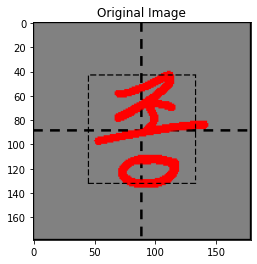

In [32]:
# Image reading & showing...
img = cv.imread('./target/손글씨.png')

plt.imshow(img[:,:,::-1])
plt.title('Original Image')

## HW4의 Problem C. 코드 활용 - Threshold-based Segmentation

Text(0.5, 1.0, 'Thresholded Image')

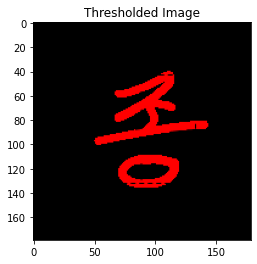

In [33]:
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

# Channel 분리
img_l = img_lab[:,:,0]
img_a = img_lab[:,:,1]
img_b = img_lab[:,:,2]

# Mask 초기화
mask = np.zeros(img.shape[:2])

# Thresholding Phase
min_a = 130 
min_b = 130 
max_a = 250 
max_b = 250 

mask = (img_a > min_a) & (img_b > min_b) & (img_a < max_a) & (img_b < max_b)

# Mask Type Change
mask = mask.reshape(img.shape[0], img.shape[1], 1).astype('uint8')

# Threshold-based Segmentation 결과 저장
result = img[:,:,::-1]*mask

# Image Showing
plt.imshow(result)
plt.title('Thresholded Image')

## HW3의 Problem B. 코드 활용 - Morphological filtering, closing

Text(0.5, 1.0, 'Morph Image')

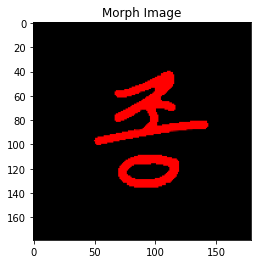

In [34]:
kernel = np.ones((3,3), np.uint8)

# closing 구현
morph_img = cv.dilate(result, kernel, iterations= 1) # dilation 후
morph_img = cv.erode(morph_img, kernel, iterations= 1) # erosion 적용

# 결과 저장 (target.jpg)
cv.imwrite('./target/target.jpg', morph_img)

plt.imshow(morph_img, cmap = 'gray')
plt.title('Morph Image')

## HW5 코드 활용 - Image Retrieval

In [35]:
from skimage.feature import hog
from os import listdir 
from os.path import isfile, join 

In [36]:
## 지정된 폴더 내부의 모든 이미지 파일의 Path를 읽어오는 함수
def get_sample_datalist(path='./'):
    print('Getting sample data list..')
    imagefile_path_list = [f for f in listdir(path) if isfile(join(path, f))]

    return imagefile_path_list

## 입력된 모든 Path에 대응되는 이미지를 읽어오는 함수
def load_my_data(imagefile_path_list, test=None):
    print('load_my_data')
    x = []
    for path in imagefile_path_list:
        img = cv.imread(path)

        #이미지는 256x256으로 모두 리사이즈
        if img.shape[:2] != (256,256):
            img = cv.resize(img, (256,256))
        x.append(img)
        
    return x

In [37]:
## HOG Feature를 추출하는 함수
def get_hog_feature(x): # x : img list [img, img, ...]

  hog_feature = []

  for i in range(len(x)):

    curr_img_hsv = cv.cvtColor(x[i], cv.COLOR_BGR2HSV)

    _, curr_hog = hog(curr_img_hsv[:,:,2], # HSV의 Value 값을 활용
                      orientations = 12, # cell 별로 각도를 얼마나 다양하게 줄 것인지
                      pixels_per_cell = (8, 8), # cell 크기
                      cells_per_block = (2, 2), # block 하나에 cell이 몇 개 들어가는지
                      visualize = True, 
                      multichannel = False) # V값만 활용하므로 False
    
    curr_hog = np.reshape(curr_hog, [-1]) # vectorlize

    hog_feature.append(curr_hog)

  return hog_feature  # return : hog_feature list

In [38]:
# 현재 위치의 모든 이미지 파일을 Query Image로 읽어오기
x_pathlist = get_sample_datalist()
x = load_my_data(x_pathlist)

# HOG feature 추출 (Query)
hog_feature = get_hog_feature(x)

Getting sample data list..
load_my_data


load_my_data


Text(0.5, 1.0, 'Target Image')

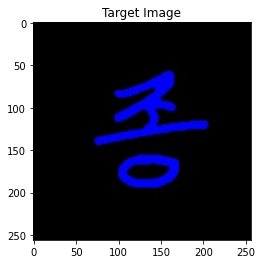

In [39]:
# Target Image Loading...
target_image_path = ['./target/target.jpg']
img_target = load_my_data(target_image_path)

# Target Image Showing...
plt.imshow(img_target[0][:,:,::-1])
plt.title('Target Image')

[1673566.06808794 1730012.27405225 2149556.9222339  2537064.23978588
 2700198.08829415]
[0 1 2 3 4]
load_my_data


######### RESULT #########

나의 손글씨와 가장 유사한 글꼴 :  문체부쓰기흘림체



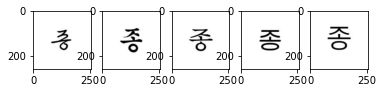

In [40]:
# Target Image Matching...(HOG feature...)
hog_feature_target = get_hog_feature(img_target)[0] # return hog feature list

# Target Feature과 Query Feature의 유사도 계산 (값이 작을수록 유사도가 높음)
distance_hog = np.sum((hog_feature_target-hog_feature)*(hog_feature_target-hog_feature), 1)

# distance_hog를 오름차순으로(유사한 순서로) 정렬하여 그의 list index를 반환
idx_hog = np.argsort(distance_hog)

print(distance_hog)
print(idx_hog)

# Retrieval result showing...
NUM_CANDIDATE = 5
query_images = load_my_data(x_pathlist)

# 결과 출력
print("\n\n######### RESULT #########\n")

print("나의 손글씨와 가장 유사한 글꼴 : ", x_pathlist[int(idx_hog[0])][:-4]) # 파일명을 활용하여 글꼴 이름 파악

print()

for i in range(NUM_CANDIDATE):
  plt.subplot(1,NUM_CANDIDATE,i+1)
  plt.imshow(query_images[idx_hog[i]][:,:,::-1])

**####위 코드를 다른 손글씨 데이터로 실행한 결과를 하단에 첨부합니다.####**

### **결과 2**

Target : 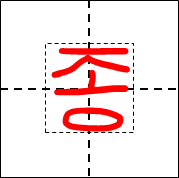

결과 :

[2197026.07212158 2111028.63755317 2412661.32109982 2419395.27375062
 2057363.50124677]
[4 1 0 2 3]
load_my_data


######### RESULT #########

나의 손글씨와 가장 유사한 글꼴 :  고딕



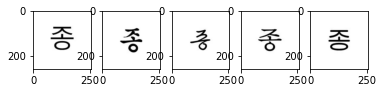

### **결과 3**

Target : 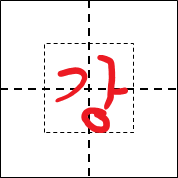

결과 : 

[1494819.16178301 1134378.93805733 1492324.66032104 1758136.82266257
 1904784.19195052]
[1 2 0 3 4]
load_my_data


######### RESULT #########

나의 손글씨와 가장 유사한 글꼴 :  궁서



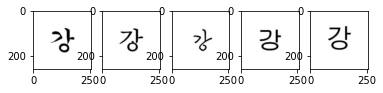

### **결과 4**

Target : 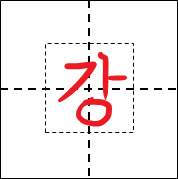

결과 : 

[1291265.84414903  841474.71490063  718228.04357714 1352813.1898782
 1688314.85855658]
[2 1 0 3 4]
load_my_data


######### RESULT #########

나의 손글씨와 가장 유사한 글꼴 :  바탕



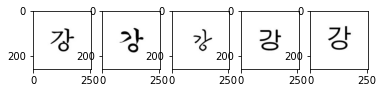